<a href="https://colab.research.google.com/github/aglucaci/longarc/blob/main/LONGARC_SCREENER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install finvizfinance

# Imports

In [24]:
from finvizfinance.screener.overview import Overview
import requests
from bs4 import BeautifulSoup
import yfinance as yf
from datetime import datetime, timedelta
import time
# import yfinance as yf

# Declares

In [25]:
filters_dict = {
    'Debt/Equity': 'Under 1',
    'EPS growthpast 5 years': 'Over 15%',
    'Price/Free Cash Flow': 'Under 50',
    'Return on Assets': 'Positive (>0%)',
    'Return on Equity': 'Over +15%',
    'Return on Investment': 'Over +15%',
    '52-Week High/Low': '0-10% above Low'
    #'52-Week High/Low': 'New Low'
}


"""
ValueError: Invalid filter 'EPS growth past 5 years'. Possible filter: ['Exchange', 'Index', 'Sector', 'Industry', 'Country', 'Market Cap.', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'Price/Cash', 'Price/Free Cash Flow', 'EPS growththis year', 'EPS growthnext year', 'EPS growthpast 5 years', 'EPS growthnext 5 years', 'Sales growthpast 5 years', 'EPS growthqtr over qtr', 'Sales growthqtr over qtr', 'Dividend Yield', 'Return on Assets', 'Return on Equity', 'Return on Investment', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Profit Margin', 'Payout Ratio', 'InsiderOwnership', 'InsiderTransactions', 'InstitutionalOwnership', 'InstitutionalTransactions', 'Float Short', 'Analyst Recom.', 'Option/Short', 'Earnings Date', 'Performance', 'Performance 2', 'Volatility', 'RSI (14)', 'Gap', '20-Day Simple Moving Average', '50-Day Simple Moving Average', '200-Day Simple Moving Average', 'Change', 'Change from Open', '20-Day High/Low', '50-Day High/Low', '52-Week High/Low', 'Pattern', 'Candlestick', 'Beta', 'Average True Range', 'Average Volume', 'Relative Volume', 'Current Volume', 'Price', 'Target Price', 'IPO Date', 'Shares Outstanding', 'Float']
"""


"\nValueError: Invalid filter 'EPS growth past 5 years'. Possible filter: ['Exchange', 'Index', 'Sector', 'Industry', 'Country', 'Market Cap.', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'Price/Cash', 'Price/Free Cash Flow', 'EPS growththis year', 'EPS growthnext year', 'EPS growthpast 5 years', 'EPS growthnext 5 years', 'Sales growthpast 5 years', 'EPS growthqtr over qtr', 'Sales growthqtr over qtr', 'Dividend Yield', 'Return on Assets', 'Return on Equity', 'Return on Investment', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Profit Margin', 'Payout Ratio', 'InsiderOwnership', 'InsiderTransactions', 'InstitutionalOwnership', 'InstitutionalTransactions', 'Float Short', 'Analyst Recom.', 'Option/Short', 'Earnings Date', 'Performance', 'Performance 2', 'Volatility', 'RSI (14)', 'Gap', '20-Day Simple Moving Average', '50-Day Simple Moving Average', '200-Day Simple Moving Average', 'Change', 'Change from Open', '20-Day High/Low', 

# Helper functions

In [26]:
def get_finviz_tickers(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    tickers = []
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        rows = soup.find_all('a', class_='screener-link-primary')
        page_tickers = [row.text for row in rows]
        if not page_tickers:
            break
        tickers.extend(page_tickers)

        # Check for next page
        next_link = soup.find('a', text='next')
        if not next_link:
            break
        url = "https://finviz.com/" + next_link['href']
    return list(set(tickers))  # remove duplicates

def calculate_cagr(ticker):
    try:
        stock = yf.Ticker(ticker)
        end_date = datetime.today()
        start_date = end_date - timedelta(days=365 * 10)

        hist = stock.history(start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
        if len(hist) == 0:
            return None

        start_price = hist['Close'][0]
        end_price = hist['Close'][-1]

        cagr = (end_price / start_price) ** (1 / 10) - 1
        return round(cagr * 100, 2)  # Return CAGR as percentage
    except Exception as e:
        print(f"Error with {ticker}: {e}")
        return None

# Main

In [27]:
foverview = Overview()
foverview.set_filter(filters_dict=filters_dict)
df = foverview.screener_view()

# CAGR Analysis
for index, row in df.iterrows():
    #time.sleep(60)
    ticker = row['Ticker']
    print(ticker, "calculating CAGR....")
    cagr = calculate_cagr(ticker)
    if cagr is not None:
        df.at[index, '10yr_CAGR'] = cagr # 10 year CAGR
    # end if
    time.sleep(1)
# end for

# Dividend Yield Analysis
for index, row in df.iterrows():
    time.sleep(1)
    ticker = row['Ticker']
    ticker = yf.Ticker(ticker)
    try:
        dividend_yield = ticker.info.get('dividendYield')
    except:
        dividend_yield = None
    print(ticker, "calculating dividend yield....")

    if dividend_yield is not None:
        df.at[index, 'Dividend Yield'] = dividend_yield
    # end if
# end for

BMI calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


CRVL calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


CTAS calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


DOCS calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


FUBO calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


IDT calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


INMD calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


NFLX calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


ODD calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


OSPN calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


PAYC calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


PCTY calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


PGR calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


RACE calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


RLI calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


TTD calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


V calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


YELP calculating CAGR....


/tmp/ipython-input-370727753.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_price = hist['Close'][0]
/tmp/ipython-input-370727753.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_price = hist['Close'][-1]


yfinance.Ticker object <BMI> calculating dividend yield....
yfinance.Ticker object <CRVL> calculating dividend yield....
yfinance.Ticker object <CTAS> calculating dividend yield....
yfinance.Ticker object <DOCS> calculating dividend yield....
yfinance.Ticker object <FUBO> calculating dividend yield....
yfinance.Ticker object <IDT> calculating dividend yield....
yfinance.Ticker object <INMD> calculating dividend yield....
yfinance.Ticker object <NFLX> calculating dividend yield....
yfinance.Ticker object <ODD> calculating dividend yield....
yfinance.Ticker object <OSPN> calculating dividend yield....
yfinance.Ticker object <PAYC> calculating dividend yield....
yfinance.Ticker object <PCTY> calculating dividend yield....
yfinance.Ticker object <PGR> calculating dividend yield....
yfinance.Ticker object <RACE> calculating dividend yield....
yfinance.Ticker object <RLI> calculating dividend yield....
yfinance.Ticker object <TTD> calculating dividend yield....
yfinance.Ticker object <V> cal

In [29]:
print("Current date and time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 2026-01-25 22:10:14


In [30]:
df_flt = df[df["10yr_CAGR"] > 15]
#df_flt

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume,10yr_CAGR,Dividend Yield
0,BMI,Badger Meter Inc,Technology,Scientific & Technical Instruments,USA,5.000000e+09,36.12,169.52,-0.0152,211788.0,21.48,0.87
1,CRVL,Corvel Corp,Financial,Insurance Brokers,USA,3.580000e+09,34.44,69.88,-0.0165,124190.0,17.04,NaN
2,CTAS,Cintas Corporation,Industrials,Specialty Business Services,USA,7.716000e+10,41.71,192.96,-0.0006,1403970.0,26.23,0.93
5,IDT,IDT Corp,Communication Services,Telecom Services,USA,1.210000e+09,15.02,48.32,-0.0183,133171.0,20.22,0.50
7,NFLX,Netflix Inc,Communication Services,Entertainment,USA,3.935200e+11,34.08,86.12,0.0309,61151803.0,24.74,NaN
10,PAYC,Paycom Software Inc,Technology,Software - Application,USA,8.570000e+09,18.93,152.29,-0.0018,775155.0,18.19,0.98
11,PCTY,Paylocity Holding Corp,Technology,Software - Application,USA,7.930000e+09,36.51,145.86,-0.0105,387755.0,17.06,NaN
12,PGR,Progressive Corp,Financial,Insurance - Property & Casualty,USA,1.208200e+11,11.29,206.03,-0.0043,3944546.0,24.71,6.75
13,RACE,Ferrari N.V,Consumer Cyclical,Auto Manufacturers,Italy,6.023000e+10,34.19,338.53,0.0029,870246.0,24.80,1.00
15,TTD,Trade Desk Inc,Communication Services,Advertising Agencies,USA,1.768000e+10,41.70,36.55,-0.0073,6154555.0,28.36,NaN


In [31]:
for index, row in df_flt.iterrows():
    ticker = row['Ticker']
    # https://www.gurufocus.com/stock/BLD/dcf
    _url = "https://www.gurufocus.com/stock/" + ticker + "/dcf"
    print(ticker, "examining DCF Margin of Safety....", _url)
    df_flt.at[index, 'DCF Margin of Safety'] = _url
# end for

df_flt.to_csv('output.csv')

BMI examining DCF Margin of Safety.... https://www.gurufocus.com/stock/BMI/dcf
CRVL examining DCF Margin of Safety.... https://www.gurufocus.com/stock/CRVL/dcf
CTAS examining DCF Margin of Safety.... https://www.gurufocus.com/stock/CTAS/dcf
IDT examining DCF Margin of Safety.... https://www.gurufocus.com/stock/IDT/dcf
NFLX examining DCF Margin of Safety.... https://www.gurufocus.com/stock/NFLX/dcf
PAYC examining DCF Margin of Safety.... https://www.gurufocus.com/stock/PAYC/dcf
PCTY examining DCF Margin of Safety.... https://www.gurufocus.com/stock/PCTY/dcf
PGR examining DCF Margin of Safety.... https://www.gurufocus.com/stock/PGR/dcf
RACE examining DCF Margin of Safety.... https://www.gurufocus.com/stock/RACE/dcf
TTD examining DCF Margin of Safety.... https://www.gurufocus.com/stock/TTD/dcf
V examining DCF Margin of Safety.... https://www.gurufocus.com/stock/V/dcf


/tmp/ipython-input-1118356650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flt.at[index, 'DCF Margin of Safety'] = _url


# Visualizations / 10yr Charts

/tmp/ipython-input-2866926885.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(row['Ticker'], period="10y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2866926885.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(row['Ticker'], period="10y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2866926885.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(row['Ticker'], period="10y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2866926885.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(row['Ticker'], period="10y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2866926885.py:7: FutureWarning: YF.download() has

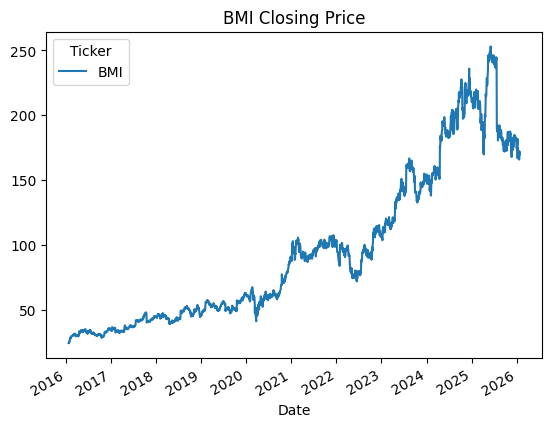

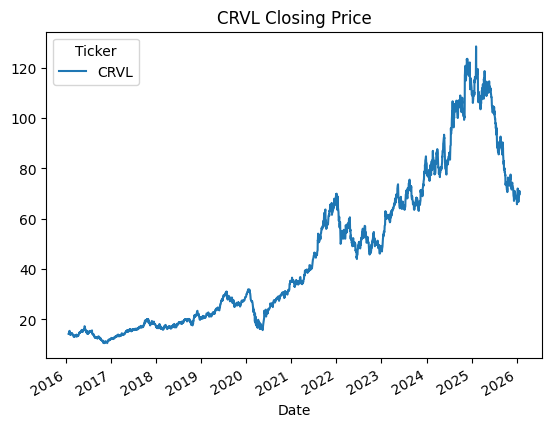

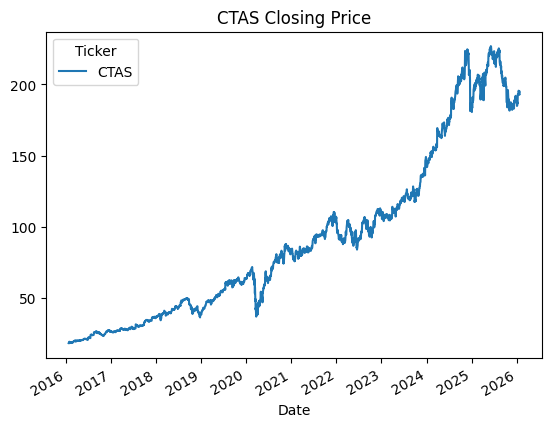

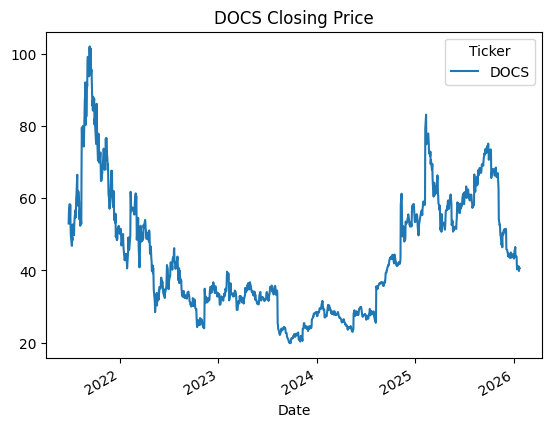

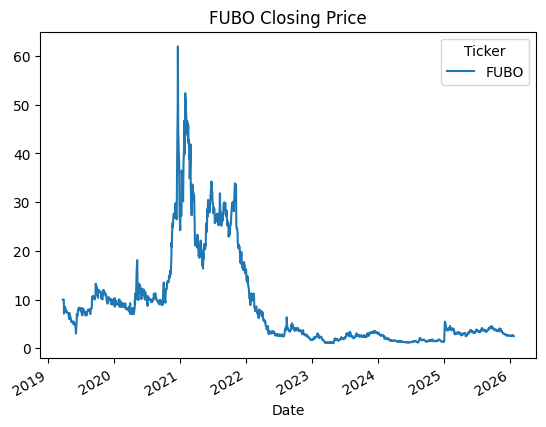

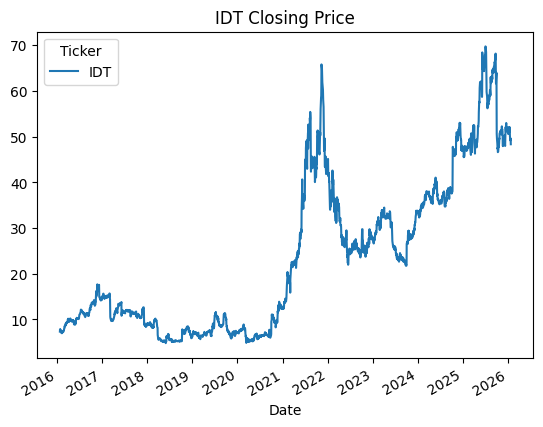

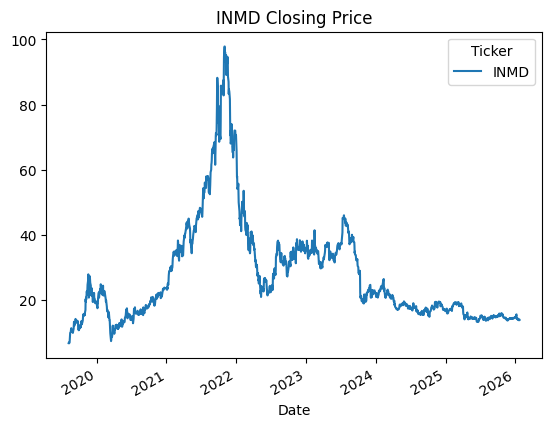

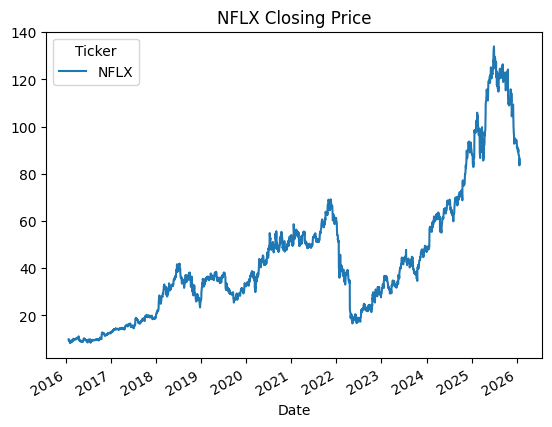

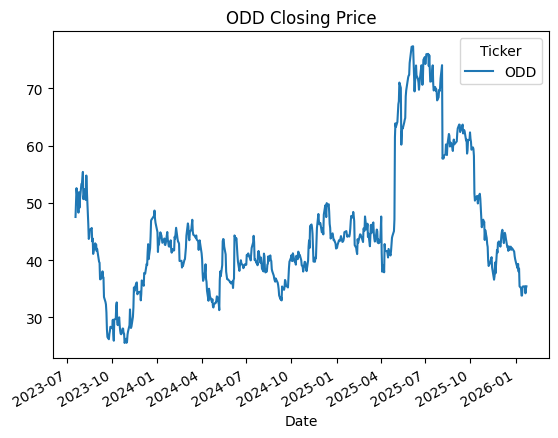

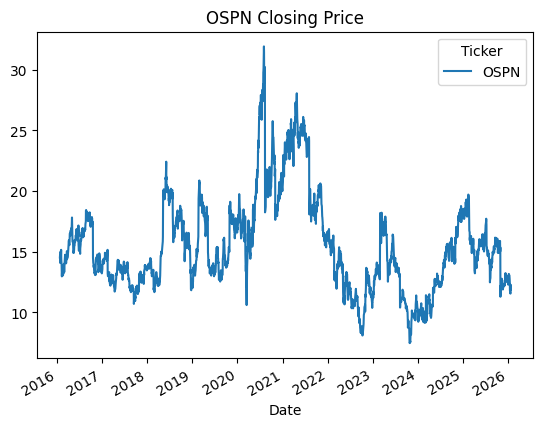

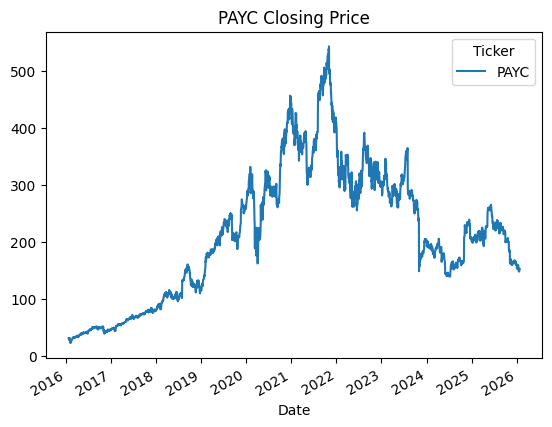

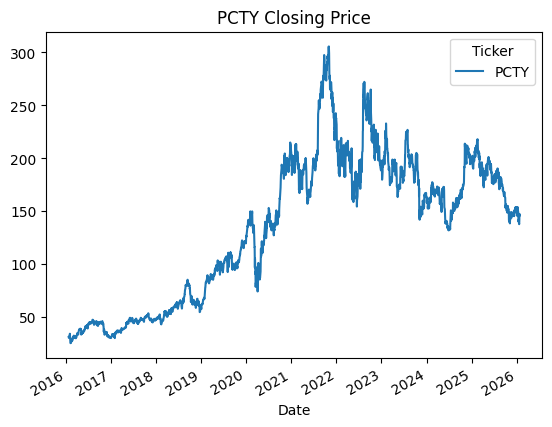

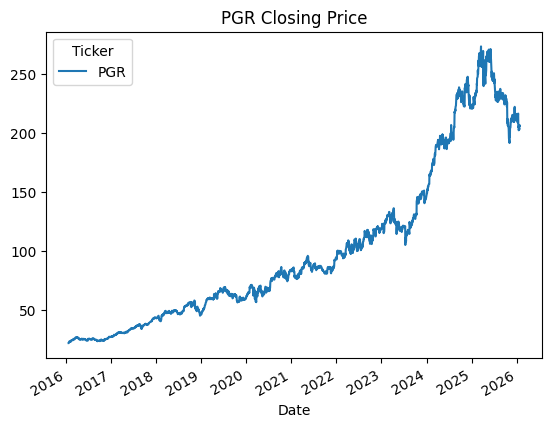

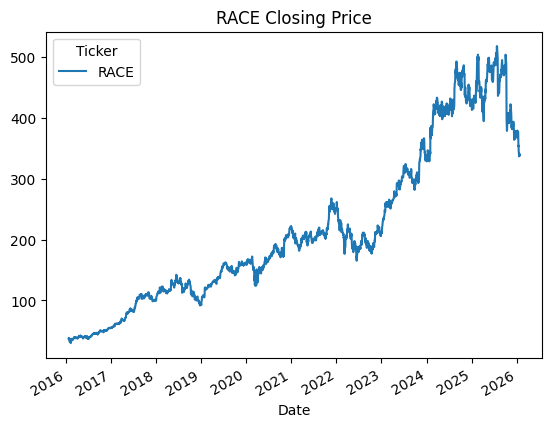

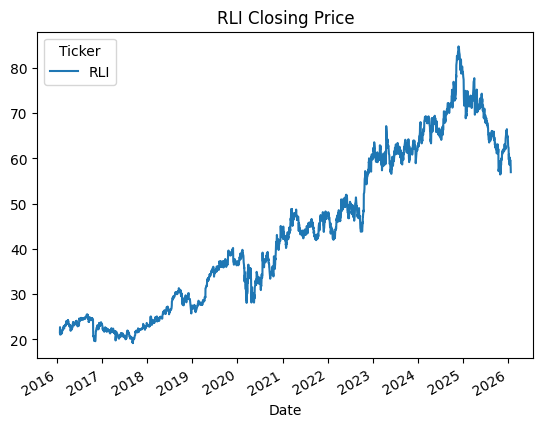

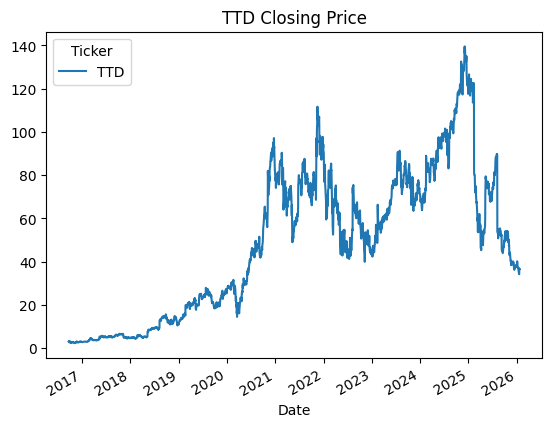

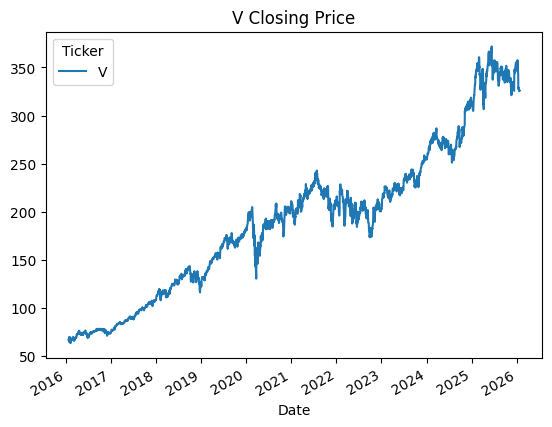

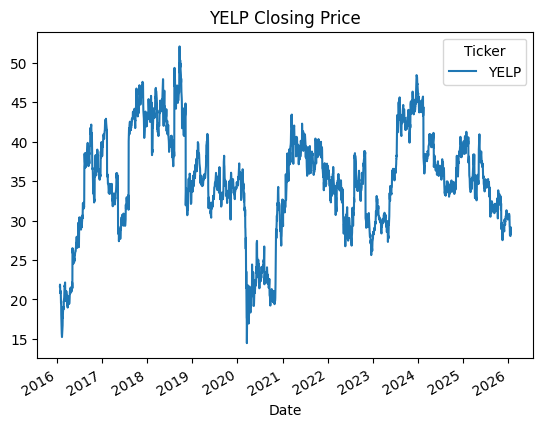

In [33]:
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

for index, row in df.iterrows():
  data = yf.download(row['Ticker'], period="10y")
  data['Close'].plot(title=f"{row['Ticker']} Closing Price")
  plt.savefig(f"images/{row['Ticker']}.png")
  #plt.show()